# TIME SERIES EXPLORATORY DATA ANALYSIS (EDA)

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the:
- store item demand dataset 
- and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_item_demand_data
from acquire import get_opsd_data
from prepare import prep_store_data
from prepare import prep_opsd_data

In [2]:
df = get_store_item_demand_data()
df.head()

Reading from csv file...
Reading from csv file...
Reading from csv file...


,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [3]:
df = prep_store_data(df)
df.head()

,item_id,quantity,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1,Tuesday,294.00


## Split data

In [4]:
#look at range of index
df.index.min(), df.index.max()
# 4 years of data

(Timestamp('2013-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2017-12-31 00:00:00+0000', tz='UTC'))

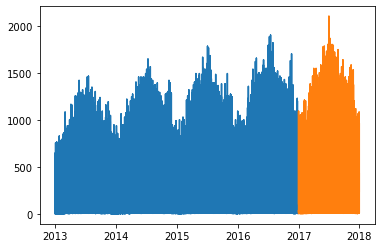

In [5]:
#train test split
train = df[:'2016'] #includes 2016
test = df['2017']

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

<AxesSubplot:xlabel='sale_date'>

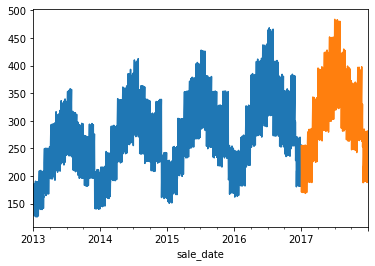

In [6]:
train.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot()

In [7]:
y = train.sales_total
y.head()

sale_date
2013-01-01 00:00:00+00:00     10.92
2013-01-01 00:00:00+00:00    218.40
2013-01-01 00:00:00+00:00    125.55
2013-01-01 00:00:00+00:00    453.60
2013-01-01 00:00:00+00:00    294.00
Name: sales_total, dtype: float64

## Visualization Options

### Ignore Time Series

<AxesSubplot:title={'center':'Frequency of Sales Total'}, ylabel='Frequency'>

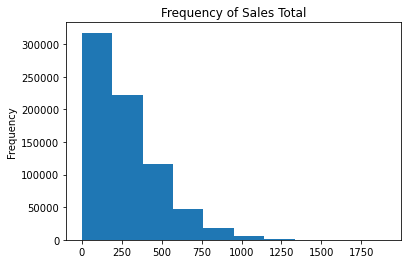

In [9]:
# distribution of target variable
y.plot.hist(title = 'Frequency of Sales Total')

In [ ]:
#treat components of the date as separate categorical feature.